<a href="https://colab.research.google.com/github/statistics-jun/2022-1-ESAA/blob/main/ESAA_0530_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2022-1 ESAA 5기 김혜준 실습 필사 - 0530(월) 13주차 과제
## <파이썬 딥러닝 텐서플로>
## PART 03 케라스(Keras)

### 06 모델 저장 및 불러오기

mnist 데이터셋 불러오기

In [1]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

11501568/11490434 [==============================] - 0s 0us/step


신경망 모델 훈련

In [2]:
# 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(256, activation='relu'), 
                             tf.keras.layers.Dense(64, activation='relu'), 
                             tf.keras.layers.Dense(32, activation='relu'), 
                             # 노드는 10개가 되어야 한다.
                             tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train,
            validation_data=(x_test, y_test), 
            epochs=10 
            )

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2235 - accuracy: 0.9322 - val_loss: 0.1084 - val_accuracy: 0.9650
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0927 - accuracy: 0.9714 - val_loss: 0.0859 - val_accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0643 - accuracy: 0.9806 - val_loss: 0.0801 - val_accuracy: 0.9757
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0408 - accuracy: 0.9868 - val_loss: 0.0849 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0320 - accuracy: 0.9895 - val_loss: 0.0744 - val_accuracy: 0.9795
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0274 - accuracy: 0.9913 - val_loss: 0.0912 - val_accuracy:

#### 6-1 모델을 파일로 저장
* `save()` 메소드 : 저장할 파일의 디렉토리를 포함하는 파일명을 매개변수로 지정하여 호출
* 모델 저장 형식
  - HDF5 포맷(.h5) : 대용량의 데이터를 저장하기 위한 파일 형식
  - SavedModel 포맷 : 텐서플로2에서 기본으로 지원하는 파일 형식

In [3]:
# 모델을 h5 포맷으로 저장
model.save('h5-model.h5')

#### 6-2 저장된 모델 복원
* `tensorflow.keras.models.load_model()` 메소드

In [4]:
# 모델 복원
h5_model = tf.keras.models.load_model('h5-model.h5')
h5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


> 모델 구조 그대로 복원

In [5]:
# 모델 검증
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.10830, acc: 0.97530


In [6]:
# 모델을 SavedModel 포맷으로 저장
model.save('saved-model')

INFO:tensorflow:Assets written to: saved-model/assets


In [7]:
# 모델 복원
saved_model = tf.keras.models.load_model('saved-model')
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 219,818
Trainable params: 219,818
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 모델 검증(HDF5 포맷)
loss, acc = h5_model.evaluate(x_test, y_test, verbose=0)
print(f'h5 model] loss: {loss:.5f}, acc: {acc:.5f}')

# 모델 검증(SavedModel 포맷)
loss, acc = saved_model.evaluate(x_test, y_test, verbose=0)
print(f'saved_model] loss: {loss:.5f}, acc: {acc:.5f}')

h5 model] loss: 0.10830, acc: 0.97530
saved_model] loss: 0.10830, acc: 0.97530


> SavedModel, HDF5 형식으로 저장 및 복원된 모델의 성능은 서로 동일

### 07 복잡한 모델 생성

#### 7-1 함수형 API(Functional API)
* Sequential API와 Functional API의 비교
  - Sequential API : 여러 층을 시퀀스 형태로 연결
    - 단방향의 Sequential 모델만 구현 가능
    - 데이터 흐름이 특정 레이어를 건너뛰거나 병합 및 분리하는 구조의 모델 구현 불가
  - **Functional API** : 함수 형태로 딥러닝 모델 정의
    - 복잡한 구조의 모델 정의 가능
    - 다중 입력, 다중 출력, 같은 레벨에 여러 개의 층을 배치하여 입력과 출력을 공유하는 구조의 모델 구현 가능

mnist 데이터셋 불러오기

In [9]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 데이터 정규화
x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

Sequential API

In [10]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)), 
                             tf.keras.layers.Dense(256, activation='relu'), 
                             tf.keras.layers.Dense(64, activation='relu'), 
                             tf.keras.layers.Dense(32, activation='relu'), 
                             tf.keras.layers.Dense(10, activation='softmax'), 
])

Functional API

1. Input 레이어 정의 : 데이터의 입력 shape 정의
2. 여러 개의 레이어를 체인 구조로 연결 : 레이어마다 반환되는 출력 값을 변수에 저장한 뒤 다음 레이어의 입력으로 연결
3. `tf.keras.Model(inputs, outputs)`에 입력 레이어와 출력 레이어를 정의해 모델 생성

In [11]:
# 모델의 레이어를 체인 구조로 연결 Input 레이어 정의
input_layer = tf.keras.Input(shape=(28, 28), name='InputLayer')

# 모델의 레이어를 체인 구조로 연결
# name 매개변수로 이름 부여
x1 = tf.keras.layers.Flatten(name='Flatten')(input_layer)
x2 = tf.keras.layers.Dense(256, activation='relu', name='Dense1')(x1)
x3 = tf.keras.layers.Dense(64, activation='relu', name='Dense2')(x2)
x4 = tf.keras.layers.Dense(10, activation='softmax', name='OutputLayer')(x3)

In [12]:
# 모델 생성
# name 매개변수로 이름 부여
func_model = tf.keras.Model(inputs=input_layer, outputs=x4, name='FunctionalModel')

# 모델 요약
func_model.summary() # 요약 출력 시 위 코드에서 정의한 이름이 함께 출력

Model: "FunctionalModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 28, 28)]          0         
                                                                 
 Flatten (Flatten)           (None, 784)               0         
                                                                 
 Dense1 (Dense)              (None, 256)               200960    
                                                                 
 Dense2 (Dense)              (None, 64)                16448     
                                                                 
 OutputLayer (Dense)         (None, 10)                650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


모델 구조도 시각화

* `tensorflow.keras.utils` 패키지 내 `plot_model()` : 모델 지정 시 구조도 출력
  - `show_shapes=True` : 데이터의 입출력 shape 출력
  - `show_layer_names=True` : 레이어의 이름 출력
  - `to_file='파일명'` : 시각화한 구조도를 이미지 파일로 저장


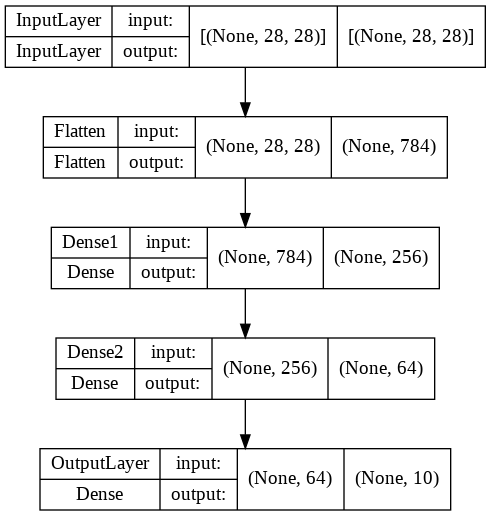

In [13]:
from tensorflow.keras.utils import plot_model

# 구조도 시각화
plot_model(func_model, show_shapes=True, show_layer_names=True, to_file='model.png')

모델 훈련

In [14]:
# 컴파일
func_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 훈련
func_model.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = func_model.evaluate(x_test, y_test, verbose=0)
print(f'Functional Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2103 - accuracy: 0.9378
Epoch 2/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0904 - accuracy: 0.9719
Epoch 3/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0607 - accuracy: 0.9808
Functional Model] loss: 0.07285, acc: 0.97820


#### 7-2 모델 서브클래싱(Model Subclassing)
* `tf.keras.Model` 클래스를 직접 상속받아 사용자가 직접 서브클래스로 딥러닝 모델 생성 가능
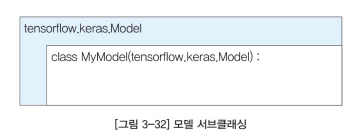

* 함수형 API로 생성한 모델과의 성능 차이는 없음

모델 인스턴스 생성

* `__init__()` : 레이어와 하이퍼파라미터 정의
* `call()` : `fit()`이 호출되어 훈련하는 경우 호출될 함수, 메소드 오버라이딩으로 구현
  - 모델의 입력부터 출력까지의 흐름(순전파)을 정의
  
    -> 모든 레이어를 체인처럼 연결

    -> 최종 출력 값 return


In [15]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(10, activation='softmax')
        
    # method overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [16]:
# 모델 생성
mymodel = MyModel()

# 모델의 이름 설정
mymodel._name = 'subclass_model'

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "subclass_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         multiple                  0         
                                                                 
 dense_8 (Dense)             multiple                  200960    
                                                                 
 dense_9 (Dense)             multiple                  16448     
                                                                 
 dense_10 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


> `mymodel` 변수에 바로 `summary()`로 요약 출력하는 것은 불가
>
> -> input_shape이 정의되지 않아 전체 모델의 구조를 생성해내지 못하기 때문
>
> => `mymodel`에 Input 레이어와 함께 shape을 정의해주면 `summary()`로 모델 요약 확인 가능

모델 훈련

In [17]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2164 - accuracy: 0.9355
Epoch 2/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0910 - accuracy: 0.9716
Epoch 3/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0607 - accuracy: 0.9811
Subclassing Model] loss: 0.07091, acc: 0.97810


#### 7-3 서브클래싱 모델 파라미터를 활용한 생성
* 장점 : 생성자 파라미터로 모델 내부 레이어의 하이퍼파라미터 지정 가능

모델 인스턴스 생성 - 생성자 파라미터 추가하여 동적으로 레이어 유닛 개수 초기화

In [18]:
class MyModel(tf.keras.Model):
    
    # 생성자 parameter 추가
    def __init__(self, units, num_classes):
        super(MyModel, self).__init__()
        # 초기값 설정
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(units, activation='relu')
        self.dense2 = tf.keras.layers.Dense(units/4, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation='softmax')
        
    # class overiding
    # 학습용 함수 정의
    # x는 input
    def call(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)
        return x

In [19]:
# 모델 생성
mymodel = MyModel(256, 10)

# 모델 input 정의
mymodel(tf.keras.layers.Input(shape=(28, 28)))

# 모델 요약
mymodel.summary()

Model: "my_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         multiple                  0         
                                                                 
 dense_11 (Dense)            multiple                  200960    
                                                                 
 dense_12 (Dense)            multiple                  16448     
                                                                 
 dense_13 (Dense)            multiple                  650       
                                                                 
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


모델 훈련

In [20]:
# 컴파일
mymodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# 훈련
mymodel.fit(x_train, y_train, epochs=3)

# 검증
loss, acc = mymodel.evaluate(x_test, y_test, verbose=0)
print(f'Subclassing Model w. parameters] loss: {loss:.5f}, acc: {acc:.5f}')

Epoch 1/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2124 - accuracy: 0.9364
Epoch 2/3
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0878 - accuracy: 0.9727
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0595 - accuracy: 0.9814
Subclassing Model w. parameters] loss: 0.07563, acc: 0.97650
